# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv("Superstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


---

# Product Performance Insights

## All Categories

In [3]:
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


## All Sub Categories

In [4]:
SubProducts = df['Sub-Category'].unique()
print(SubProducts)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


## Number of Sub Categories per Each Category

In [15]:
subproducts_counts = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subproducts_counts.columns = ['Category', 'Sub-Category Count']
subproducts_counts = subproducts_counts.sort_values(by='Sub-Category Count', ascending=False)
print(subproducts_counts)

          Category  Sub-Category Count
1  Office Supplies                   9
0        Furniture                   4
2       Technology                   4


## Total Sales per Each Sub Category

In [16]:
subproducts_count_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
subproducts_count_sales.columns = ['Category', 'Sub-Category', 'Total Sales']
subproducts_count_sales = subproducts_count_sales.sort_values(by='Total Sales', ascending=False)
print(subproducts_count_sales)

           Category Sub-Category  Total Sales
16       Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
11  Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
6   Office Supplies      Binders  203412.7330
15       Technology     Machines  189238.6310
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
0         Furniture    Bookcases  114879.9963
4   Office Supplies   Appliances  107532.1610
2         Furniture  Furnishings   91705.1640
10  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
5   Office Supplies          Art   27118.7920
7   Office Supplies    Envelopes   16476.4020
9   Office Supplies       Labels   12486.3120
8   Office Supplies    Fasteners    3024.2800


## Visualizing Total Sales per Each Sub Category

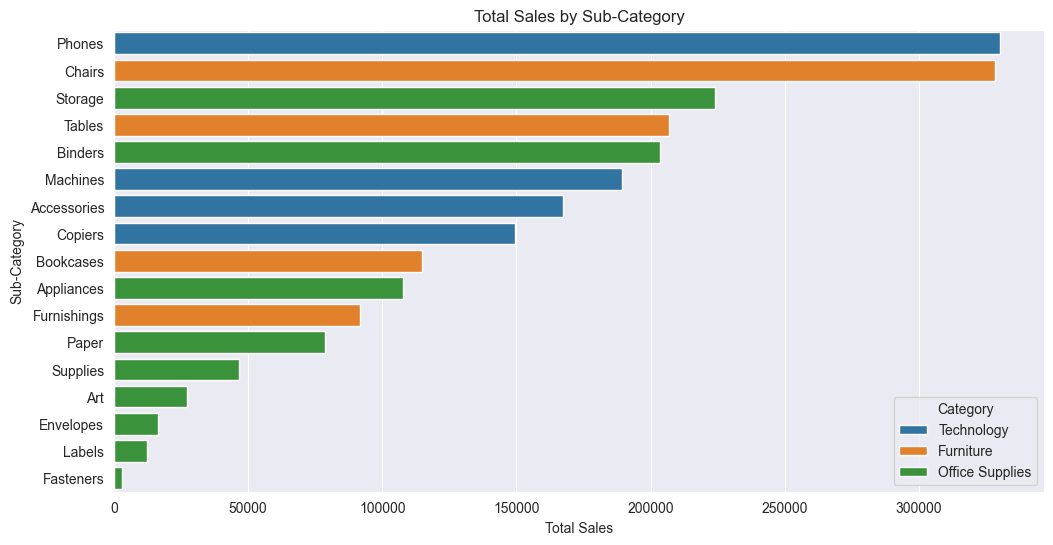

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=subproducts_count_sales, x='Total Sales', y='Sub-Category', hue='Category', dodge=False)
plt.title('Total Sales by Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.show()

## Total Sales per Each Category

In [17]:
product_category_sales = df.groupby('Category')['Sales'].sum().reset_index()
product_category_sales.columns = ['Category', 'Total Sales']
product_category_sales = product_category_sales.sort_values(by='Total Sales', ascending=False)
print(product_category_sales)

          Category  Total Sales
2       Technology  836154.0330
0        Furniture  741999.7953
1  Office Supplies  719047.0320


## Visualizing Sales Share by Product Category

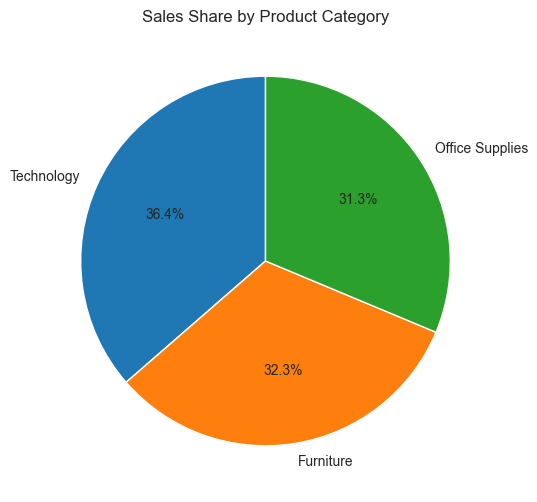

In [18]:
plt.figure(figsize=(6, 6))
plt.pie(product_category_sales['Total Sales'],
        labels=product_category_sales['Category'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Sales Share by Product Category')
plt.show()

---